Homework 8 : Yeqi Chen 
===

Root Locus 

**<span style="color: darkgreen">Due Sunday May 26 at 11:59pm</span>**


In [33]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sympy import *
from matplotlib import animation
from scipy import signal


# Uncomment on Google colab
# !pip install JSAnimation
# !pip install control

#from JSAnimation.IPython_display import display_animation
from control import * 

%matplotlib inline

# Comment out in Google colab 
init_printing(use_latex='mathjax')

def MatrixFromColumns(clist):
    return Matrix(clist).reshape(
        clist[0].shape[0], 
        len(clist)).transpose()

# 1. Full State Feedback

For each of the following systems:

- a) transform the system into state space using whatever form you like
- b) design a full state feedback controller to place the system poles at $-1 \pm
j$
- c) find the closed loop transfer function of the system
- d) find the steady state error.

System one: $\frac{\displaystyle s+1}{\displaystyle s^2+5s+1}$

System two: $\frac{\displaystyle s+2}{\displaystyle  s^2+s}$


System 1 a)<br>
In phase conocical form the state-space equals: 

\begin{align}
\dot x & = \begin{pmatrix}
 0 & 1 \\
 -1 & -5
\end{pmatrix} x + \begin{pmatrix}
0 \\
1
\end{pmatrix} u \\
y & = ( 1 \; 1 \; ) \; x .
\end{align}

b) Suppose we want to design the controller so that the closed loop poles are at $-1\pm i$,
<br>
so we want the characteristice polynomial to be 
$$ s^2+2s+2$$ 
 Setting $u = -K x + r$ gives the new characteristic polynomial

$$
s^2 + (5+k_1)s + (1+k_0) \; = \; s^2 + (5+k_1)s + k_0+1
$$

setting the coefficients equal to the desired coefficients gives the two equations

\begin{align}
k_1 + 5 & = 2  \\
k_0+1 & = 2
\end{align}

so that a choice of $k_1 = -3$ and $k_0 = 1$ will put the closed loop poles at the desired locations.

c) \begin{align}
A-BK & = \begin{pmatrix}
0 & 1  \\
-1 & -5
\end{pmatrix} - \begin{pmatrix}
0 \\
1
\end{pmatrix} (-3 \;1 ) \\
 & = \begin{pmatrix}
0 & 1 \\
-2 & -2
\end{pmatrix} 
\end{align}

In [8]:
var("a0 a1 b0 b1 s")
A = Matrix([
    [0,1],
    [-2,-2]
])
B = Matrix([[0],[1]])
C = Matrix([[1, 1]])
T = (C*(s*eye(2)-A).inv()*B)[0]
T = cancel(T)
T

   s + 1    
────────────
 2          
s  + 2⋅s + 2

d) 
$$
e(\infty) = \lim_{s \rightarrow 0} s(\frac{1}{s} - \frac{1}{s}T(s))
$$
$$ 
= 1-T(0) 
$$ 
$$ = 1-\frac{1}{2} = \frac{1}{2}$$

System2 
In phase conocical form the state-space equals: 

\begin{align}
\dot x & = \begin{pmatrix}
 0 & 1 \\
 0 & -1
\end{pmatrix} x + \begin{pmatrix}
0 \\
1
\end{pmatrix} u \\
y & = ( 2 \; 1 \; ) \; x .
\end{align}

b) Suppose we want to design the controller so that the closed loop poles are at $-1\pm i$,
<br>
so we want the characteristice polynomial to be 
$$ s^2+2s+2$$ 
 Setting $u = -K x + r$ gives the new characteristic polynomial

$$
s^2 + (k_1+1)s + (k_0) \; = \; s^2 + (k_1+1)s + k_0
$$

setting the coefficients equal to the desired coefficients gives the two equations

\begin{align}
k_1 +1 & = 2  \\
k_0+1 & = 2
\end{align}

so that a choice of $k_1 = 1$ and $k_0 = 2$ will put the closed loop poles at the desired locations.

c) \begin{align}
A-BK & = \begin{pmatrix}
0 & 1  \\
0 & -1
\end{pmatrix} - \begin{pmatrix}
0 \\
1
\end{pmatrix} (1 \;2) \\
 & = \begin{pmatrix}
0 & 1 \\
-2 & -2
\end{pmatrix} 
\end{align}

In [59]:
var("a0 a1 b0 b1 s")
A = Matrix([
    [0,1],
    [-2,-2]
])
B = Matrix([[0],[1]])
C = Matrix([[2, 1]])
T = (C*(s*eye(2)-A).inv()*B)[0]
T = cancel(T)
T

   s + 2    
────────────
 2          
s  + 2⋅s + 2

d) 
$$
e(\infty) = \lim_{s \rightarrow 0} s(\frac{1}{s} - \frac{1}{s}T(s))
$$
$$ 
= 1-T(0) 
$$ 
$$ = 1-1 = 0$$

In [65]:
T.subs(s,0)

1

# 2. Integrator

System one above has a steady state error. Define a control system with full state feedback and an integrator that puts the closed loop poles at -5 and $-1 \pm j$. Simulate the system response to a step input.

From the problem 1 we have 
\begin{align}
\dot x & = \begin{pmatrix}
 0 & 1 \\
  -1 & -5
\end{pmatrix} x + \begin{pmatrix}
0 \\
1
\end{pmatrix} u \\
y & = ( 0 \; 1 ) \; x
\end{align}

Adding an integrator and controller givies

$$
A-BK =  \begin{pmatrix}
0 & 1 \\
-1-k_0 & -k_1 - 5
\end{pmatrix}
$$

and

$$
Bk_I = \begin{pmatrix}
0 \\
k_I
\end{pmatrix} 
$$

so

\begin{align}
\begin{pmatrix}
\dot x_1 \\
\dot x_2 \\
\dot x_I 
\end{pmatrix} & = \begin{pmatrix}
  0 & 1 & 0 \\
  -1-k_0 & -k_1-5 & k_I \\
  -1 & -1 & 0
\end{pmatrix} \begin{pmatrix}
x_1 \\
x_2 \\
x_I 
\end{pmatrix} + \begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix} r \\
y & = ( 1 \; 1 \; 0 ) \; \begin{pmatrix}
x_1 \\
x_2 \\
x_I 
\end{pmatrix} .
\end{align} 

In [10]:
var("s k0 k1 ki")
A = Matrix([
    [0,1,0],
    [-1-k0,-k1-5,ki],
    [-1, -1, 0]
])
poly = (s*eye(3)-A).det().collect(s)
poly

      2                               
ki + s ⋅(k₁ + s + 5) + s⋅(k₀ + ki + 1)

From the question we know that the desired characteristic polynomial should be (s+5)(s+1-j)(s+1+j) = $s^3+7s^2+12s+10$

In [11]:
solve(
    Matrix([Poly(poly,s).coeffs()]) 
    - Matrix([[1,7,12,10]])
,[k0,k1,ki])

{k₀: 1, k₁: 2, ki: 10}

In [15]:
Anew = A.subs(k0,1).subs(k1,2).subs(ki,10)
Anew

⎡0   1   0 ⎤
⎢          ⎥
⎢-2  -7  10⎥
⎢          ⎥
⎣-1  -1  0 ⎦

In [18]:
B = Matrix([[0],[0], [1]])
C = Matrix([[1, 1,0]])
T = (C*(s*eye(3)-Anew).inv()*B)[0]
T = cancel(T)
T

      10⋅s + 10      
─────────────────────
 3      2            
s  + 7⋅s  + 12⋅s + 10

Text(0.5, 0, 't')

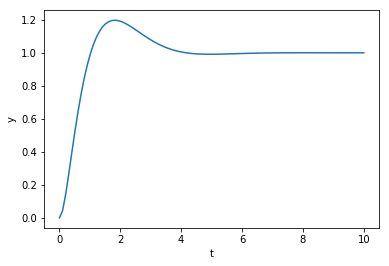

In [28]:
#pb = T(den,s).all_coeffs()
#pa = T(num,s).all_coeffs()
pa = [10,10]
pb = [1,7,12,10]
sys = signal.TransferFunction(pa,pb)
t,y = signal.step(sys,T=np.linspace(0,10,100))

plt.plot(t,y)
plt.ylabel('y')
plt.xlabel('t')

# 3. Controllability and Observability

Consider the following state space system.

\begin{align}
\dot x & = \begin{pmatrix}
0 & -1 \\
-1 & 1
\end{pmatrix} x + \begin{pmatrix}
0 \\
a
\end{pmatrix} u \\
y & = \begin{pmatrix}
b+1 & b
\end{pmatrix} x
\end{align}

- a) For what values of $a$ and $b$ is the system controllable?
- b) For what values of $a$ and $b$ is the system observable?

Determine the above by using the controllability and observability matrices.

In [48]:
#a)
var("a,b")
A = Matrix([
    [0,-1],
    [-1,1]
])
B = Matrix([
    [0],
    [a]
])
C = Matrix([[b+1,b]])
M = MatrixFromColumns([B,A*B])
M, M.rank()

⎛⎡0  -a⎤   ⎞
⎜⎢     ⎥, 2⎟
⎝⎣a  a ⎦   ⎠

From the given matrix M, we can see that if $a \ne 0$, the matrix has rank 2 equal to its size, so it's controllable for $a \ne 0$

In [49]:
O = Matrix([C,C*A])
O, O.rank()

⎛⎡b + 1  b ⎤   ⎞
⎜⎢         ⎥, 2⎟
⎝⎣ -b    -1⎦   ⎠

In [55]:
O.subs(b,124141211).rank()

2

For any given b value, the matrix has full rank, so it's observalbe. 

# 4. Full State Feedback and Observer Design

Consider the plant

$$
G(s) = \frac{s+1}{(s+a)(s+8)(s+10)}
$$

where $a = 1$. 

- a) Find a convenient state space representation of model $G(s)$.
- b) Using `place` design a controller for the system that puts the poles at $-1$ and $-2 \pm -2j$.
- c) Using `place` design an observer with poles at -10, -11 and -12. 
- d) Simulate the closed loop system with the observer and the controller with a step input. Make sure to start the observer and plant with different states. Plot the states with the state estimates overlaid. 
- e) Find a state space representation of the closed loop system and show that its $A$ matrix has the six poles you placed.

a) <br>If I plug in a = 1, simplyfing G we get 
$$
G(s) = \frac{s+1}{s^3+19s^2+98s+80}
$$
using the conocical form we get: 
\begin{align}
\dot x & = \begin{pmatrix}
0 & 1 & 0 \\
0 & 0 & 1  \\
-80 & -98 & -19
\end{pmatrix} x + \begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix} u \\
y & = ( 1 \; 1  \;0) \; x .
\end{align}

In [87]:
#b)
A = Matrix([
    [0,1,0],
    [0,0,1],
    [-80,-98,-19]])

B = Matrix([
    [0],
    [0],
    [1]
])

C = Matrix([[1,1,0]])

An = np.array(A).astype(np.float64)
Bn = np.array(B).astype(np.float64)
Cn = np.array(C).astype(np.float64)
K = Matrix(place(An,Bn,[-1,-2+2*1j,-2-2*1j]))
K

[-72.0  -86.0  -14.0]

In [88]:
#C)
An = np.array(An.transpose()).astype(np.float64)
Cn = np.array(Cn.transpose()).astype(np.float64)
L = Matrix(place(An,Cn,[-10,-11,-12]))

L

[-683424001950748.0  683424001950751.0  -683424001950779.0]

In [89]:
L= L.transpose()
L


⎡-683424001950748.0⎤
⎢                  ⎥
⎢683424001950751.0 ⎥
⎢                  ⎥
⎣-683424001950779.0⎦

C:\Users\Villy\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


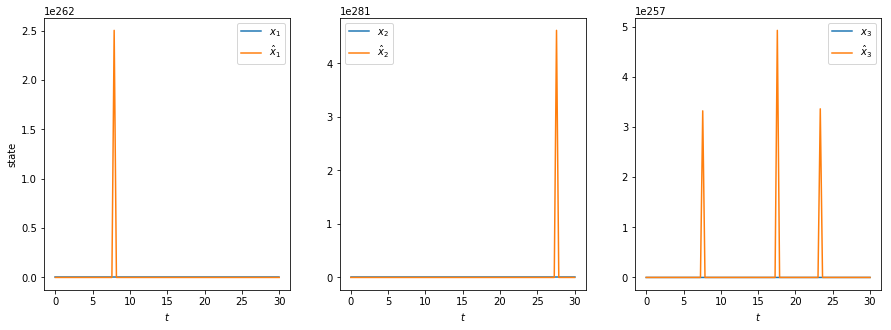

In [90]:
def input(t):
    if t < 10:
        return 1
    elif t < 20:
        return 0
    else:
        return 1
    
def f(X,t):
    x = X[0:3].reshape(3,1)
    xhat = X[3:6].reshape(3,1)
    u = -(K*Matrix(xhat))[0] + input(t)
    fb = L * ( C*x - C*xhat )
    return flatten(
        (A*Matrix(x) + B*u).tolist() + 
        (A*Matrix(xhat) + B*u + fb).tolist())

t=np.linspace(0,30,100)
X = spi.odeint(f,[1,1,1,0,0,0],t)
fig,ax = plt.subplots(1,3,figsize=(15,5))

for i in range(3):
    ax[i].plot(t,X[:,i],label="$x_%d$" % (i+1))
    ax[i].plot(t,X[:,3+i],label="$\hat{x}_%d$" % (i+1));
    ax[i].set_xlabel("$t$")
    ax[i].legend()
    
ax[0].set_ylabel("state");

In [91]:
# Check the eigenvalues
top = Matrix([A.transpose(), -(B*K).transpose()]).transpose()
bot = Matrix([(L*C).transpose(), (A-B*K-L*C).transpose()]).transpose()
Atilde = Matrix([top,bot])
N(Atilde,2)

⎡   0        1.0       0       0         0       0  ⎤
⎢                                                   ⎥
⎢   0         0       1.0      0         0       0  ⎥
⎢                                                   ⎥
⎢ -80.0     -98.0    -19.0    72.0      86.0    14.0⎥
⎢                                                   ⎥
⎢-6.8e+14  -6.8e+14    0    6.8e+14   6.8e+14    0  ⎥
⎢                                                   ⎥
⎢6.8e+14   6.8e+14     0    -6.8e+14  -6.8e+14  1.0 ⎥
⎢                                                   ⎥
⎣-6.8e+14  -6.8e+14    0    6.8e+14   6.8e+14   -5.0⎦

In [92]:
e,v = np.linalg.eig(np.array(Atilde.tolist()).astype(np.float64));
e

array([ -1.68044916e+00 +5.88632022e+06j,
        -1.68044916e+00 -5.88632022e+06j,
        -4.13532118e-03 +0.00000000e+00j,
        -3.22957431e+02 +0.00000000e+00j,
         1.49257108e+02 +2.72471462e+02j,   1.49257108e+02 -2.72471462e+02j])

The calculated codes gave different poles from the specificaiton; and the graph looks wierd. I asked TA and found that we were using similiar code, but has totally different result. I don't know where the problem comes from. 